In [2]:
# Bibliotecas para manipulação de dados
import pandas as pd
import numpy as np

In [3]:
df_2024 = pd.read_csv('https://drive.google.com/uc?export=download&id=1YGcXBLH_5-59wQibasR-6VHEKaK47kMs', encoding='latin1', delimiter=';')
df_2023 = pd.read_csv('https://drive.google.com/uc?export=download&id=1_f6qGoJwqluOfeBzpibotFoDVPQZ3njr', encoding='latin1', delimiter=';')
df_2022 = pd.read_csv('https://drive.google.com/uc?export=download&id=17IUo01wirfmH-4RW7M_fB3tsSuWmWIE0', encoding='latin1', delimiter=';')
df_2021 = pd.read_csv('https://drive.google.com/uc?export=download&id=1EhS7pfOcjSpCM-edzhS7ujDXy4gxECcG', encoding='latin1', delimiter=';')
df_2020 = pd.read_csv('https://drive.google.com/uc?export=download&id=1yzXkKqJTdgECUykskI-iOKCYX5gFQN5y', encoding='latin1', delimiter=';')
df_2019 = pd.read_csv('https://drive.google.com/uc?export=download&id=1JSehd4431JHfcYJXLChW-jfgUaCG_UP0', encoding='latin1', delimiter=';')
df_2018 = pd.read_csv('https://drive.google.com/uc?export=download&id=1ultdVyJlsLxl-zURVCS5pCr992FbqY66', encoding='latin1', delimiter=';')
df_2017 = pd.read_csv('https://drive.google.com/uc?export=download&id=1S8UcBGMrQiyinyX51yrVyBhch3ayrByx', encoding='latin1', delimiter=';')

In [4]:
# Concatar em um dataset único
df_todos_anos = pd.concat([df_2024, df_2023, df_2022, df_2021, df_2020, df_2019, df_2018, df_2017], axis=0)
df_todos_anos

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,571789.0,2024-01-01,segunda-feira,03:56:00,ES,101,38,CONCEICAO DA BARRA,Ultrapassagem Indevida,Colisão lateral sentido oposto,...,1,1,1,1,3,-18.48261,-39.92379,SPRF-ES,DEL04-ES,UOP02-DEL04-ES
1,571804.0,2024-01-01,segunda-feira,04:50:00,PI,343,185,PIRIPIRI,Manobra de mudança de faixa,Colisão frontal,...,0,1,0,0,2,-4.296033,-41.767327,SPRF-PI,DEL02-PI,UOP01-DEL02-PI
2,571806.0,2024-01-01,segunda-feira,04:30:00,BA,116,578,BREJOES,Ingestão de álcool pelo condutor,Colisão frontal,...,0,1,2,0,4,-13.071583,-39.961111,SPRF-BA,DEL03-BA,UOP02-DEL03-BA
3,571818.0,2024-01-01,segunda-feira,06:30:00,SE,101,18,MALHADA DOS BOIS,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,...,1,0,2,1,3,-10.356019,-36.905522,SPRF-SE,DEL02-SE,UOP02-DEL02-SE
4,571838.0,2024-01-01,segunda-feira,05:00:00,MT,364,240,RONDONOPOLIS,Condutor deixou de manter distância do veículo...,Colisão traseira,...,0,2,1,0,3,-16.179141,-54.789053,SPRF-MT,DEL02-MT,UOP01-DEL02-MT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89562,547182.0,2017-04-10,segunda-feira,07:00:00,CE,20,"16,5",EUSEBIO,Falta de Atenção à Condução,Colisão traseira,...,0,4,0,0,4,"-3,89643058","-38,50331694",SPRF-CE,DEL02-CE,UOP02-DEL02-CE
89563,555322.0,2017-10-15,domingo,12:35:00,PR,116,"15,5",CAMPINA GRANDE DO SUL,Velocidade Incompatível,Saída de leito carroçável,...,0,1,0,0,1,"-25,10049901","-48,69404558",SPRF-PR,DEL01-PR,UOP02-DEL01-PR
89564,556942.0,2017-02-07,terça-feira,19:05:00,RS,116,"198,1",PICADA CAFE,Animais na Pista,Atropelamento de Animal,...,0,0,0,1,1,"-29,47290623","-51,14826679",SPRF-RS,DEL05-RS,UOP02-DEL05-RS
89565,599256.0,2017-10-23,segunda-feira,18:22:00,RJ,40,3,COMENDADOR LEVY GASPARIAN,Falta de Atenção à Condução,Capotamento,...,0,0,0,1,1,"-22,0135","-43,2358",SPRF-RJ,DEL06-RJ,UOP02-DEL05-RJ


In [6]:
# Aplicar regras de filtragem
def padronizar_df(df):
    df['km'] = df['km'].str.replace(',', '.').astype(float)
    df['latitude'] = df['latitude'].astype(str).str.replace(',', '.')
    df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
    df['longitude'] = df['longitude'].astype(str).str.replace(',', '.')
    df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')    
    df['datetime'] = pd.to_datetime(df['data_inversa'] + ' ' + df['horario'].str[:2])
    df = df[(df.uf == 'SC') & (df.br==101) & ((df.km < 239) & (df.km >= 100))]
    df = df[['datetime', 'km', 'sentido_via', 'latitude', 'longitude']]
    df['acidente'] = 1
    
    return df

df_todos_anos = padronizar_df(df_todos_anos)
df_todos_anos

,datetime,km,sentido_via,latitude,longitude,acidente
66,2024-01-03 09:00:00,209.8,Crescente,-27.610005,-48.638951,1
99,2024-01-04 00:00:00,127.8,Crescente,-26.972843,-48.682995,1
152,2024-01-05 12:00:00,114.0,Crescente,-26.861929,-48.728670,1
170,2024-01-05 18:00:00,179.2,Crescente,-27.372817,-48.633227,1
254,2024-01-08 12:00:00,182.8,Crescente,-27.397990,-48.630359,1
...,...,...,...,...,...,...
89221,2017-05-17 07:00:00,203.0,Decrescente,-27.566330,-48.613154,1
89268,2017-07-03 13:00:00,101.0,Crescente,-26.765700,-48.686400,1
89272,2017-11-04 01:00:00,136.8,Crescente,-27.014170,-48.612967,1
89472,2017-08-16 19:00:00,130.0,Crescente,-26.984076,-48.669771,1


In [7]:
df_caracteristicas = pd.read_csv('https://drive.google.com/uc?export=download&id=12IEjF4wPAurDEhY7YrOyGe-APN9OM_Ls')
df_caracteristicas = df_caracteristicas[['sentido_via', 'km', 'latitude', 'longitude']]

In [8]:
df_caracteristicas = df_caracteristicas.sort_values(by='latitude')
df_todos_anos = df_todos_anos.sort_values(by='latitude')

df_todos_anos_ = pd.merge_asof(df_todos_anos, df_caracteristicas, 
                           on='latitude', by=['sentido_via'], 
                           direction='nearest', tolerance=0.05)  
df_todos_anos_ = df_todos_anos_.dropna(axis=0)
df_todos_anos = df_todos_anos_.rename(columns={"km_y": "km"})
df_todos_anos = df_todos_anos[['datetime', 'sentido_via', 'km', 'acidente']]

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir o tema personalizado
sns.set_theme(
    style="whitegrid",
    palette="dark",
    font='sans-serif',
    font_scale=1.3,
    rc={
        "axes.spines.right": False,
        "axes.spines.top": False,
        "figure.figsize": (10, 6),
        "axes.facecolor": "white",
        "figure.facecolor": "white",
        "text.color": "black",           # Cor padrão do texto
        "axes.labelcolor": "black",      # Cor dos rótulos dos eixos
        "xtick.color": "black",          # Cor dos ticks do eixo x
        "ytick.color": "black",          # Cor dos ticks do eixo y
        "axes.titlecolor": "black",      # Cor do título dos eixos
    }
)

# Aumentar a resolução das figuras
%config InlineBackend.figure_format = 'retina'

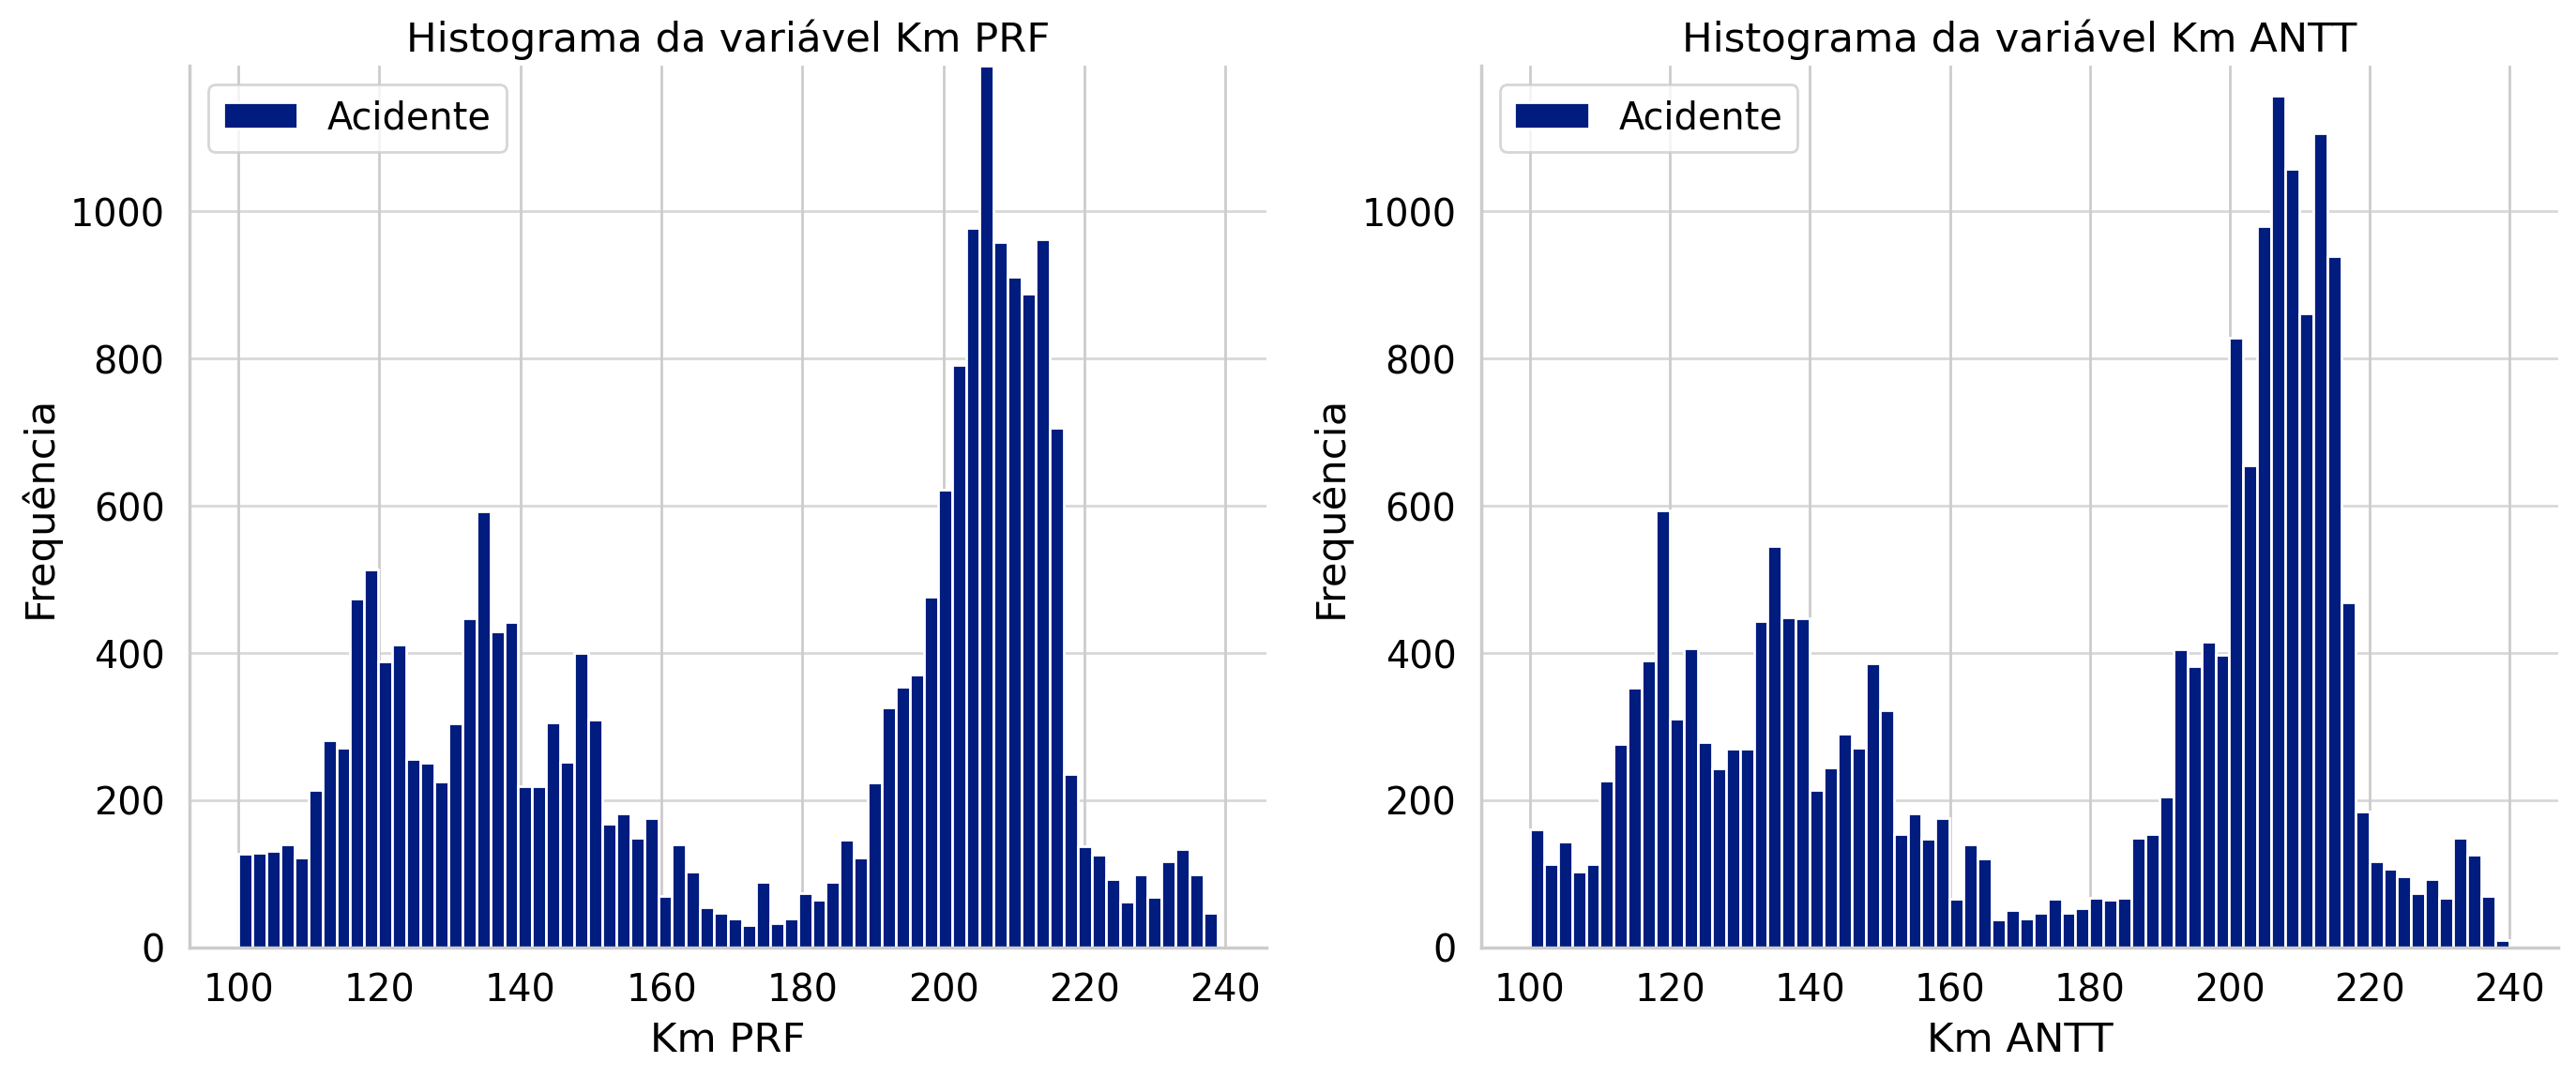

In [14]:
import matplotlib.pyplot as plt

numericas = ['km_x', 'km_y']
dic = {'km_x': 'Km PRF', 'km_y': 'Km ANTT'}

# Calcula o maior valor de frequência entre todos os histogramas
max_y = 0
for var in numericas:
    counts, _ = np.histogram(df_todos_anos_[df_todos_anos_['acidente'] == 1][var], bins=70)
    max_y = max(max_y, counts.max())

# Plota com o mesmo ylim
plt.figure(figsize=(14, 6))
for i, var in enumerate(numericas, 1):
    plt.subplot(1, 2, i)
    df_todos_anos_[df_todos_anos_['acidente'] == 1][var].plot(kind='hist', bins=70, label='Acidente')

    plt.ylim(0, max_y)  # mesmo limite y para todos os gráficos

    plt.title(f'Histograma da variável {dic[var]}')
    plt.xlabel(dic[var])
    plt.ylabel('Frequência')
    plt.grid(axis='y', alpha=0.75)
    plt.legend()

plt.tight_layout()
plt.savefig('output.png', dpi=300)

In [15]:
# Definir intervalo de km e criar intervalos de km = 1
kms = np.round(np.arange(100, 239, 0.1), 1)

# Definir o intervalo de tempo
horas = pd.date_range(start="2017-01-01", end="2024-12-31 23:00", freq="h")

sentido = df_todos_anos['sentido_via'].unique()

# Criar combinações de rodovia, intervalo de km e hora
df_completo = pd.MultiIndex.from_product([horas,  kms, sentido], names=['datetime', 'km', 'sentido_via']).to_frame(index=False)
df_completo

,datetime,km,sentido_via
0,2017-01-01 00:00:00,100.0,Decrescente
1,2017-01-01 00:00:00,100.0,Crescente
2,2017-01-01 00:00:00,100.1,Decrescente
3,2017-01-01 00:00:00,100.1,Crescente
4,2017-01-01 00:00:00,100.2,Decrescente
...,...,...,...
194955835,2024-12-31 23:00:00,238.7,Crescente
194955836,2024-12-31 23:00:00,238.8,Decrescente
194955837,2024-12-31 23:00:00,238.8,Crescente
194955838,2024-12-31 23:00:00,238.9,Decrescente


In [16]:
df_completo = df_completo.sort_values(by='km')
df_todos_anos = df_todos_anos.sort_values(by='km')

df_completo = pd.merge_asof(df_completo, df_todos_anos, 
                           on='km', by=['datetime', 'sentido_via'], 
                           direction='nearest', tolerance=0.05)  

df_completo = df_completo.fillna(0)
df_completo

,datetime,km,sentido_via,acidente
0,2018-11-27 02:00:00,100.0,Decrescente,0.0
1,2018-11-27 02:00:00,100.0,Crescente,0.0
2,2017-05-02 04:00:00,100.0,Decrescente,0.0
3,2017-05-02 04:00:00,100.0,Crescente,0.0
4,2020-11-10 08:00:00,100.0,Decrescente,0.0
...,...,...,...,...
194955835,2024-12-27 08:00:00,238.9,Crescente,0.0
194955836,2024-12-27 11:00:00,238.9,Decrescente,0.0
194955837,2024-12-27 11:00:00,238.9,Crescente,0.0
194955838,2024-12-27 10:00:00,238.9,Decrescente,0.0


In [19]:
from sklearn.model_selection import train_test_split

# Dividir o conjunto de dados em treinamento e teste
train, test = train_test_split(df_completo, test_size=0.01, stratify=df_completo['acidente'])

# Separar as classes majoritária e minoritária
df_nao_acidente_train = train[train['acidente'] == 0]
df_acidente_train = train[train['acidente'] == 1]

# Definir o tamanho desejado para a classe majoritária
# Igualar ao número da classe minoritária
tamanho = len(df_acidente_train)  

# Realizar a subamostragem da classe majoritária
df_nao_acidente_subamostrado = df_nao_acidente_train.sample(tamanho)

# Combinar as classes
df_train_balanceado = pd.concat([df_nao_acidente_subamostrado, df_acidente_train])

df_test = test

# Exibir os tamanhos dos conjuntos
print("Tamanho do conjunto de treinamento balanceado:", len(df_train_balanceado))
print("Tamanho do conjunto de teste:", len(df_test))
print("Proporção de acidentes no conjunto de treinamento balanceado:", df_train_balanceado['acidente'].mean())
print("Proporção de acidentes no conjunto de teste:", df_test['acidente'].mean())

Tamanho do conjunto de treinamento balanceado: 40622
Tamanho do conjunto de teste: 1949559
Proporção de acidentes no conjunto de treinamento balanceado: 0.5
Proporção de acidentes no conjunto de teste: 0.00010515198565419154


In [20]:
df_train_balanceado.to_csv('df_train.csv', index=False)
df_test.to_csv('df_test.csv', index=False)